# 【課題1】データセットの取得

In [1]:
import pandas as pd
train = pd.read_csv('train.csv',encoding='shift_jis')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 【課題2】データセット自体の調査

- 79の説明変数があり、様々な要因が住宅価格へ影響を与えている。
- テストセットの住宅価格の値を予測する。
- RMSEにてよって評価される。
- あやめデータは分類問題だったが、こちらは予測問題。目的変数が数字となる。
- SalePriceが目的変数で他にはいっぱいある。普通に考えるとあまり関係無さそうな変数も入ってそう。

- OverallQual：家の全体的な完成度を10段階で評価。確実にここが値段に関わってきそう
- OverallCond:こっちは完成度ではなく、状態。中古の場合適用？どちらにせよこの値も深く関わってきそう

# 【課題3】データの確認

In [16]:
# dtypeの確認
train.dtypes.sort_values().head(40),train.dtypes.sort_values().tail(41)

(Id                 int64
 BsmtUnfSF          int64
 TotalBsmtSF        int64
 1stFlrSF           int64
 2ndFlrSF           int64
 LowQualFinSF       int64
 GrLivArea          int64
 BsmtFullBath       int64
 BsmtHalfBath       int64
 FullBath           int64
 HalfBath           int64
 BedroomAbvGr       int64
 KitchenAbvGr       int64
 TotRmsAbvGrd       int64
 Fireplaces         int64
 GarageCars         int64
 GarageArea         int64
 WoodDeckSF         int64
 OpenPorchSF        int64
 EnclosedPorch      int64
 3SsnPorch          int64
 ScreenPorch        int64
 PoolArea           int64
 MiscVal            int64
 MoSold             int64
 YrSold             int64
 BsmtFinSF2         int64
 BsmtFinSF1         int64
 SalePrice          int64
 MSSubClass         int64
 LotArea            int64
 OverallQual        int64
 OverallCond        int64
 YearBuilt          int64
 YearRemodAdd       int64
 GarageYrBlt      float64
 LotFrontage      float64
 MasVnrArea       float64
 Foundation 

In [2]:
# 結構object型も多いから大変そう
train.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [64]:
# salespriceが目的変数
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


- SalePriceが目的変数だが、標準偏差もかなり大きく、平均値と５０%の値が大きめにずれているので、偏っているデータと予想される。
- とても高い家が少しだけ紛れ込んでいるから、平均が引き上げられてる

# 【課題4】欠損値への対応

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import japanize_matplotlib
%matplotlib inline
import seaborn as sns

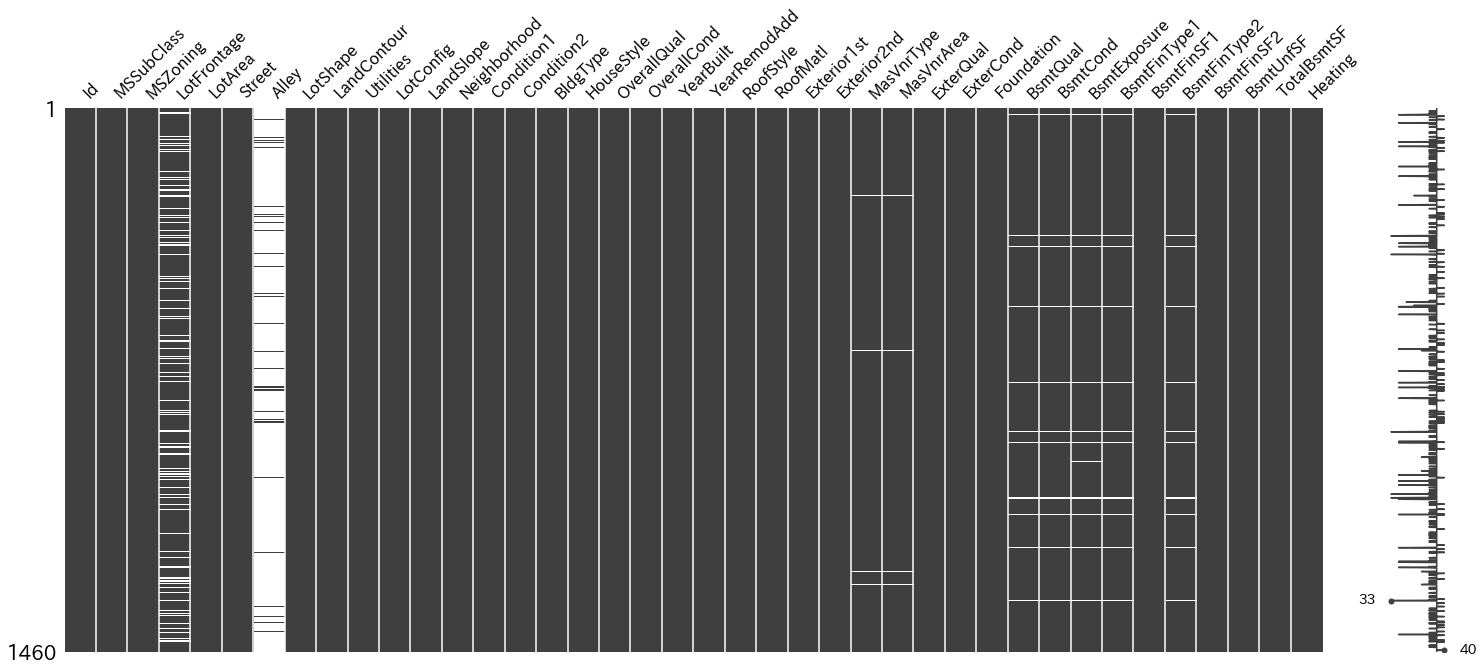

In [23]:
# missingnoがうまくインポートできた。
import missingno as msno
msno.matrix(train.iloc[:,:40])

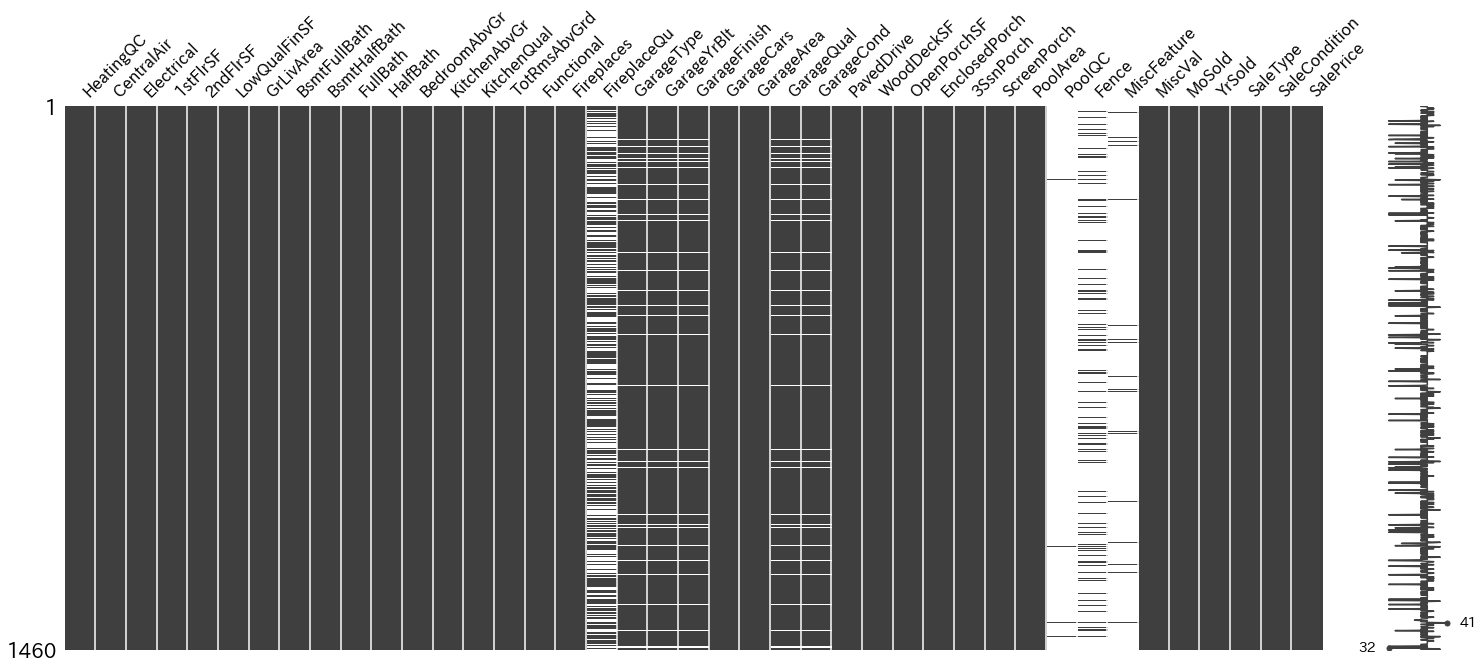

In [24]:
msno.matrix(train.iloc[:,40:])

- 欠損値がある列と無い列がはっきりしている。
- 欠損値が多い列は列ごと消してしまっても良さそう

In [8]:
#欠損値の割合
(train.isnull().sum() /len(train)).sort_values(ascending=False)

PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
FireplaceQu      0.472603
LotFrontage      0.177397
GarageCond       0.055479
GarageType       0.055479
GarageYrBlt      0.055479
GarageFinish     0.055479
GarageQual       0.055479
BsmtExposure     0.026027
BsmtFinType2     0.026027
BsmtFinType1     0.025342
BsmtCond         0.025342
BsmtQual         0.025342
MasVnrArea       0.005479
MasVnrType       0.005479
Electrical       0.000685
Utilities        0.000000
YearRemodAdd     0.000000
MSSubClass       0.000000
Foundation       0.000000
ExterCond        0.000000
ExterQual        0.000000
Exterior2nd      0.000000
Exterior1st      0.000000
RoofMatl         0.000000
RoofStyle        0.000000
YearBuilt        0.000000
                   ...   
GarageArea       0.000000
PavedDrive       0.000000
WoodDeckSF       0.000000
OpenPorchSF      0.000000
3SsnPorch        0.000000
BsmtUnfSF        0.000000
ScreenPorch      0.000000
PoolArea    

In [9]:
# 欠損値が5つ以上ある列の削除
df = train.drop(train.columns[train.isnull().sum() > 5],axis=1)
df

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000


In [10]:
# 欠損値がある行を削除
df = df.dropna()
df

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000


# 【課題5】用語の調査

- 尖度
- 歪度

**尖度**
- 分布の鋭さを表す数字
- 正規分布と比較して、尖度が大きい場合は鋭いピークと、長く太い裾を持った分布、小さい場合は逆。
- 正規分布の尖度を0とする場合と3とする場合がある。
- 尖度というより、裾の重さを表現しているといったほうがわかりやすい

**歪度**
- 分布の非対称性を表す指標
- 歪度の符号により、正の歪み、負の歪みを持つ分布と言われる。
- 0は左右対称

# 【課題6】分布の確認

/Users/takahashiakira/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


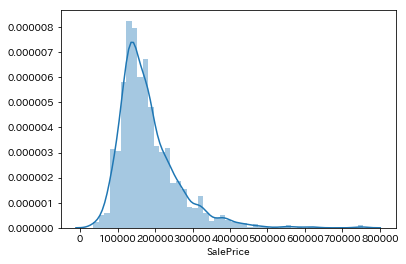

In [11]:
#　分布の確認
sns.distplot(df.SalePrice)

In [12]:
#　尖度,歪度
df.SalePrice.kurtosis(),df.SalePrice.skew()

(6.529263049673958, 1.8819429948035529)

/Users/takahashiakira/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


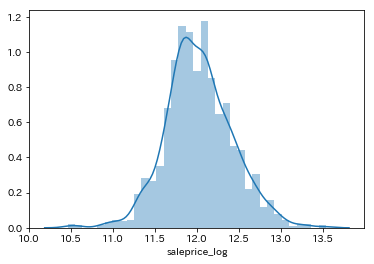

In [13]:
#　対数変換
df['saleprice_log'] = np.log(df.SalePrice)
sns.distplot(df['saleprice_log'])

In [14]:
# 対数の尖度、歪度
df.saleprice_log.kurtosis(), df.saleprice_log.skew()

(0.806927847502148, 0.12131775882415026)

対数変換することにより、大きい値が小さくなり小さい値が大きくなって分布の形が変形した。
順番を変えず、正規分布に近似することができた。尖度も歪度もいい感じ

# 【課題7】相関係数の確認

- 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。
- 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。
- 選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。
- 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。

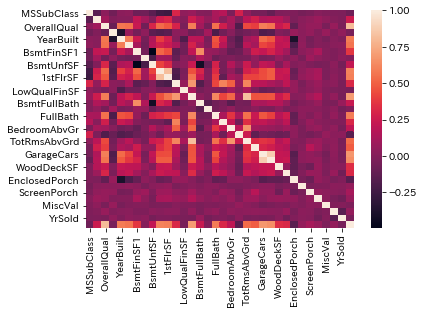

In [29]:
# 相関行列
corr = df.drop(['Id','SalePrice'],axis=1).corr()
sns.heatmap(corr)

潰れて見えない

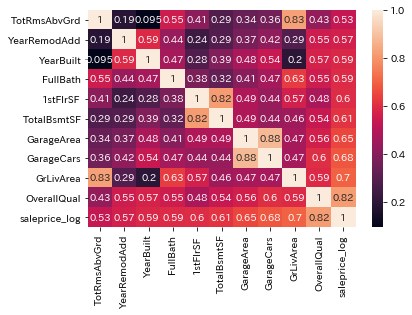

In [30]:
# 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。
corr2 = df[abs(corr.saleprice_log).sort_values()[-11:].index].corr()
sns.heatmap(corr2,annot=True)

選んだ特徴量が示しているもの
- 'TotRmsAbvGrd' = 地上の部屋数
- 'YearRemodAdd' = 改築された年
- 'YearBuilt' = 築年数
- 'FullBath' = 地上にある風呂の数
- '1stFlrSF' = 一階の延床面積
- 'TotalBsmtSF' = 地下室の延床面積
- 'GarageArea' = ガレージの面積
- 'GarageCars' =　ガレージに入る車のキャパの数
- 'GrLivArea' =　地上階の延床面積
- 'OverallQual' = 家の全体的なランク10段階

In [35]:
# お互いの相関係数が高いものを３つ選び出す。

corr2['GarageArea']['GarageCars'],corr2['TotalBsmtSF']['1stFlrSF'],corr2['TotRmsAbvGrd']['GrLivArea']

(0.8826130266800475, 0.8193932708606806, 0.8255764500702357)

それぞれ意味しているものは割と同じものだから相関が高い。

ガレージの面積と車のキャパはほぼ同じ。

地下室がない場合地下室の延床面積は１階の面積となる。

部屋数が増えれば面積も増えるので、相関が高い

# （オプション）【課題8】重要度の算出

In [36]:
# Xとｙに分ける
y = df['saleprice_log']
X = df.drop(['saleprice_log', 'SalePrice'],axis=1)
X.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [37]:
X.dtypes

Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
OverallQual       int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
ExterQual        object
ExterCond        object
Foundation       object
BsmtFinSF1        int64
BsmtFinSF2        int64
BsmtUnfSF         int64
TotalBsmtSF       int64
                  ...  
CentralAir       object
Electrical       object
1stFlrSF          int64
2ndFlrSF          int64
LowQualFinSF      int64
GrLivArea         int64
BsmtFullBath      int64
BsmtHalfBath      int64
FullBath          int64
HalfBath          int64
BedroomAbvGr    

In [38]:
# むりやり全て数値へ変換
from sklearn.preprocessing import LabelEncoder
#LabelEncoderのインスタンスを生成
X = X.apply(LabelEncoder().fit_transform)

In [65]:
# ランダムフォレスト
from sklearn.ensemble import RandomForestRegressor

randomforest = RandomForestRegressor(random_state=0,n_jobs=-1)
model = randomforest.fit(X,y)
importances = model.feature_importances_

/Users/takahashiakira/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


<function matplotlib.pyplot.show(*args, **kw)>

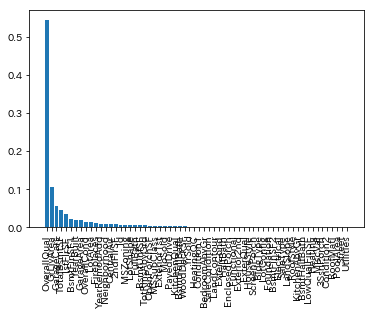

In [68]:
#可視化
indices = np.argsort(importances)[::-1]

names = [X.columns[i] for i in indices]

plt.figure()
plt.bar(range(X.shape[1]),importances[indices])
plt.xticks(range(X.shape[1]),names,rotation=90)
plt.show

In [41]:
#みえないからトップ１０
for i in indices[:10]:
    print(X.columns[i])

OverallQual
GrLivArea
GarageCars
TotalBsmtSF
1stFlrSF
BsmtFinSF1
YearBuilt
GarageArea
OverallCond
LotArea


さっきの相関高いやつと近い感じ